<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-4-Sprint-1-NLP/blob/main/module4-topic-modeling/LS_DS_414_Topic_Modeling_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import spacy
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Subset 3 topics
categories = ["comp.sys.mac.hardware", "comp.graphics", "sci.space"]
data = fetch_20newsgroups(categories = categories)

In [ ]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
data["target"][:5]

array([1, 2, 1, 2, 0])

In [ ]:
data["target_names"][:5]

['comp.graphics', 'comp.sys.mac.hardware', 'sci.space']

In [ ]:
data['data'][1000]

"From: ayr1@cunixa.cc.columbia.edu (Amir Y Rosenblatt)\nSubject: Power Supplies for Mac 512's\nSummary: I need them\nNntp-Posting-Host: cunixa.cc.columbia.edu\nReply-To: ayr1@cunixa.cc.columbia.edu (Amir Y Rosenblatt)\nOrganization: Columbia University\nLines: 13\n\n\nI thnik i'll be able to pick up  a piar of Mac 512K's for nothing, but\ntheir power supplies are dead.  Anyone know where I can pick up a pair\nof refurbished PS's for cheap (preferably mail order).\nYes, I do have uses planned fior them.  One will be sold to a friend who\njust needs a terminal to connect via modem to his e-mail account.\nThe other will be used by me as a net client to run my downloads and/or\nprinting.\n  \nAlso, what is the latest system software usable with these suckers?\n\n\n\n"

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [ ]:
v1 = TfidfVectorizer(stop_words="english")

X = data["data"]
X_train = v1.fit_transform(X) #dtm

In [ ]:
p1 = {
    'n_estimators':[10,20],
    'max_depth': [None, 7]
}

In [ ]:
clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5, n_jobs=-1, verbose=1)
gs1.fit(X_train, data['target'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#gs1.predict(["Sample text"])

In [ ]:
test_sample = v1.transform(["I like medical science and doctors and good health."])
test_sample.shape

(1, 28321)

In [ ]:
test_sample.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pred = gs1.predict(test_sample)
pred

array([0])

In [ ]:
data['target_names'][pred[0]]

'comp.graphics'

### GridSearch with BOTH the Vectoizer & Classifier

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Create a pipeline with a vectorize and a classifier

v2 = TfidfVectorizer()
clf= RandomForestClassifier()

pipe = Pipeline([("vect", v2), ("clf", clf)])

# 2. Use Grid Search to optimize the entire pipeline
p2 = {
    "vect__max_features" : [1000, 5000],
    "clf__n_estimators" : [10,20],
    "clf__max_depth" : [None, 7]
}

gs2 = GridSearchCV(pipe, p2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(data["data"], data["target"])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   18.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [ ]:
pred = gs2.predict(["Photoshop is kinda cool"])

In [ ]:
data['target_names'][pred[0]]

'comp.graphics'

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

In [ ]:
gs2.best_params_

{'clf__max_depth': None, 'clf__n_estimators': 20, 'vect__max_features': 1000}

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [ ]:
# Download spacy model
#import spacy.cli
#spacy.cli.download("en_core_web_lg")

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim import. Check out docs: https://radimrehurek.com/gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#import spacy

# Data viz tool to look at LDA results and manually determine topics
# Docs: https://pyldavis.readthedocs.io/en/latest/readme.html
# Has a more detailed example notebook
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 1.6MB 5.9MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=a273292707e2903bde0cf32c7538c5270aee0b7ef92edae3f73b5aa23dcb5b92
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [ ]:
df = pd.DataFrame({
    'content': data['data'],
    'target': data['target'],
    'target_names': [data['target_names'][i] for i in data['target']]
})
df

,content,target,target_names
0,From: meharg@kits.sfu.ca (Gersham William Meha...,1,comp.sys.mac.hardware
1,From: sheaffer@netcom.com (Robert Sheaffer)\nS...,2,sci.space
2,From: winstead@faraday.ece.cmu.edu (Charles Ho...,1,comp.sys.mac.hardware
3,From: ralph.buttigieg@f635.n713.z3.fido.zeta.o...,2,sci.space
4,From: ednobles@sacam.OREN.ORTN.EDU (Edward d N...,0,comp.graphics
...,...,...,...
1750,From: noble@possum.den.mmc.com (Joe A Noble)\n...,0,comp.graphics
1751,From: wmiler@nyx.cs.du.edu (Wyatt Miler)\nSubj...,2,sci.space
1752,From: sean@whiting.mcs.com (Sean Gum)\nSubject...,0,comp.graphics
1753,From: eacj@theory.TC.Cornell.EDU (Julian Vries...,1,comp.sys.mac.hardware


In [ ]:
df.head()

,content,target,target_names
0,From: meharg@kits.sfu.ca (Gersham William Meha...,1,comp.sys.mac.hardware
1,From: sheaffer@netcom.com (Robert Sheaffer)\nS...,2,sci.space
2,From: winstead@faraday.ece.cmu.edu (Charles Ho...,1,comp.sys.mac.hardware
3,From: ralph.buttigieg@f635.n713.z3.fido.zeta.o...,2,sci.space
4,From: ednobles@sacam.OREN.ORTN.EDU (Edward d N...,0,comp.graphics


In [ ]:
# For reference on regex: https://docs.python.org/3/library/re.html
# Create cleaning function next time

# From 'content' column: 
# 1. Remove whitespace 
df["content"] = df["content"].apply(lambda x: x.strip())
# 2. Remove Emails
df["content"] = df.content.apply(lambda x: re.sub("From: \S+@\S+", "", x))
# 3. Remove new line characters
df["content"] = df["content"].apply(lambda x: re.sub("\s+", " ", x))
# 4. Remove non-alphanumeric characters
df["content"] = df["content"].apply(lambda x: re.sub("[^0-9 a-zA-Z]+", "", x))

<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:10: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:10: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:10: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:10: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:10: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:1

In [ ]:
df.head()

,content,target,target_names
0,Gersham William Meharg Subject Re Centris 610...,1,comp.sys.mac.hardware
1,Robert Sheaffer Subject Re Astronomy Program ...,2,sci.space
2,Charles Holden Winstead Subject ftp site for ...,1,comp.sys.mac.hardware
3,Ralph Buttigieg Subject Why not give 1 billio...,2,sci.space
4,Edward d Nobles Subject windows imagine Organ...,0,comp.graphics


In [ ]:
# Handy parallelization tool for running locally
# Docs: https://github.com/nalepae/pandarallel/tree/v1.5.1
# Parallelizes pandas methods
# For windows, needs to be from WSL
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

In [ ]:
#nlp = spacy.load("en_core_web_lg")

In [ ]:
# Create 'lemmas' column
df["lemmas"] = df["content"].apply(lambda x: [token.lemma_.lower() for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True)])

In [ ]:
df.head()

,content,target,target_names,lemmas
0,Gersham William Meharg Subject Re Centris 610...,1,comp.sys.mac.hardware,"[ , gersham, william, meharg, subject, centris..."
1,Robert Sheaffer Subject Re Astronomy Program ...,2,sci.space,"[ , robert, sheaffer, subject, astronomy, prog..."
2,Charles Holden Winstead Subject ftp site for ...,1,comp.sys.mac.hardware,"[ , charles, holden, winstead, subject, ftp, s..."
3,Ralph Buttigieg Subject Why not give 1 billio...,2,sci.space,"[ , ralph, buttigieg, subject, 1, billion, yea..."
4,Edward d Nobles Subject windows imagine Organ...,0,comp.graphics,"[ , edward, d, nobles, subject, window, imagin..."


### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [ ]:
# Create Dictionary and pass in tokens
# Docs for corpora.Dictionary: https://radimrehurek.com/gensim/corpora/dictionary.html
id2word = corpora.Dictionary(df['lemmas'] )

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [ ]:
id2word[10]

'be'

In [ ]:
len(corpus)

1755

In [ ]:
df.shape

(1755, 4)

In [ ]:
corpus[0]

[(0, 5),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 3),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 2),
 (13, 2),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 3),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 3),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 2),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 2),
 (45, 1),
 (46, 2),
 (47, 1)]

In [ ]:
df['content'][5]

' Pat Subject Re Keeping Spacecraft on after Funding Cuts Organization Express Access Online Communications USA Lines 11 Distribution world NNTPPostingHost accessdigexnet Some birds require constant management for survival Pointing a sensor at the sun even when powered down may burn it out Pointing a parabolic antenna at Sol from venus orbit may trash the foci elements Even if you let teh bird drift it may get hosed by some cosmic phenomena pat'

In [ ]:
df["lemmas"][5][:5]

[' ', 'pat', 'subject', 'keep', 'spacecraft']

In [ ]:
corpus[5][:5]

[(0, 1), (18, 1), (25, 1), (33, 1), (41, 1)]

In [ ]:
# Human readable format of corpus (term-frequency)
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

[(' ', 1),
 ('distribution', 1),
 ('lines', 1),
 ('organization', 1),
 ('subject', 1),
 ('online', 1),
 ('sun', 1),
 ('let', 1),
 ('world', 1),
 ('11', 1),
 ('access', 1),
 ('accessdigexnet', 1),
 ('antenna', 1),
 ('bird', 2),
 ('burn', 1),
 ('communications', 1),
 ('constant', 1),
 ('cosmic', 1),
 ('cuts', 1),
 ('drift', 1),
 ('element', 1),
 ('express', 1),
 ('foci', 1),
 ('funding', 1),
 ('hose', 1),
 ('keep', 1),
 ('management', 1),
 ('nntppostinghost', 1),
 ('orbit', 1),
 ('parabolic', 1),
 ('pat', 2),
 ('phenomenon', 1),
 ('point', 2),
 ('power', 1),
 ('require', 1),
 ('sensor', 1),
 ('sol', 1),
 ('spacecraft', 1),
 ('survival', 1),
 ('teh', 1),
 ('trash', 1),
 ('usa', 1),
 ('venus', 1)]

# Part 2: Estimate a LDA Model with Gensim

 ### Train an LDA model

In [ ]:
# %%time
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            chunksize=100,
#                                            passes=10,
#                                            per_word_topics=True)
# lda_model.save("lda_model.model")

# # https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# %%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=3, # Make this N, where N is number of topics in dataset
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=2) # Make this N-1 where N is total number of cores available. Google colab only has 2 cores
lda_multicore.save('lda_multicore.model')

# # https://radimrehurek.com/gensim/models/ldamulticore.html

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
from pprint import pprint

### View the topics in LDA model

In [ ]:
# Prints topic indices and the 10 most occuring tokens for each topic. One way to determine what topics to create
# Better way is by using the data viz tool, pyldavis in part 3 below
pprint(lda_multicore.print_topics())
#doc_lda = lda_multicore[corpus]

[(0,
  '0.027*" " + 0.013*"space" + 0.005*"launch" + 0.004*"nasa" + 0.004*"orbit" + '
  '0.004*"organization" + 0.003*"satellite" + 0.003*"system" + 0.003*"subject" '
  '+ 0.003*"mission"'),
 (1,
  '0.040*" " + 0.011*"not" + 0.010*"subject" + 0.010*"organization" + '
  '0.008*"write" + 0.007*"  " + 0.006*"lines" + 0.005*"article" + 0.005*"like" '
  '+ 0.005*"nntppostinghost"'),
 (2,
  '0.050*" " + 0.007*"subject" + 0.007*"image" + 0.006*"organization" + '
  '0.006*"file" + 0.006*"  " + 0.005*"write" + 0.005*"line" + 0.005*"not" + '
  '0.004*"use"')]


### What is topic Perplexity?
Perplexity is a statistical measure of how well a probability model predicts a sample. As applied to LDA, for a given value, you estimate the LDA model. Then given the theoretical word distributions represented by the topics, compare that to the actual topic mixtures, or distribution of words in your documents.

### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”

In [ ]:
# Compute Perplexity. It's a model attribute
print('\nPerplexity: ', lda_multicore.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_multicore, 
                                     texts=df['lemmas'], 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -8.366663388942763

Coherence Score:  0.49659017385226917


# Part 3: Interpret LDA results & Select the appropriate number of topics

In [ ]:
# Useful tool to help determine names of topics
# Takes a high dim dataset and projects it onto 2-dim to visualize
# Each blue circle is a potential topic with corresponding words and their frequencies
# Ideally there would be litle overlap between topics, we want them to be distinct
# Good cleaning and training the model well aids this but sometimes a doc is just meaningfully related
# There's a link bottom right for a white-paper article about it

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
pyLDAvis.display(vis)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=2, limit=7, step=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

CPU times: user 1min, sys: 9.53 s, total: 1min 9s
Wall time: 1min 51s


In [ ]:
coherence_values

[0.49137169572603545,
 0.4475046180997387,
 0.48146168854761184,
 0.4803934818014487,
 0.4075109023339871]

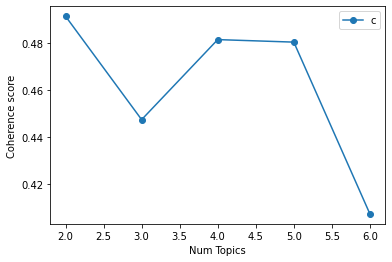

In [ ]:
# Recall that higher coherence score --> better (terms in the topic are related)

limit=7; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values, "o-")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4914
Num Topics = 3  has Coherence Value of 0.4475
Num Topics = 4  has Coherence Value of 0.4815
Num Topics = 5  has Coherence Value of 0.4804
Num Topics = 6  has Coherence Value of 0.4075


In [ ]:
# Select the model and print the topics
optimal_model = model_list[0]
#optimal_model =  models.LdaModel.load('optimal_model.model')
model_topics = optimal_model.show_topics(formatted=False)
model_topics


[(0,
  [(' ', 0.026607234),
   ('space', 0.008453656),
   ('not', 0.0048627015),
   ('organization', 0.004731946),
   ('subject', 0.0046996223),
   ('write', 0.004161021),
   ('nasa', 0.003252045),
   ('  ', 0.0031979412),
   ('article', 0.0030986306),
   ('system', 0.0030880251)]),
 (1,
  [(' ', 0.050033838),
   ('subject', 0.008554803),
   ('organization', 0.0079559935),
   ('not', 0.007087512),
   ('  ', 0.006562357),
   ('write', 0.0058223456),
   ('lines', 0.004798723),
   ('line', 0.004697783),
   ('university', 0.0041536517),
   ('nntppostinghost', 0.0038855313)])]

In [ ]:
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.027*" " + 0.008*"space" + 0.005*"not" + 0.005*"organization" + '
  '0.005*"subject" + 0.004*"write" + 0.003*"nasa" + 0.003*"  " + '
  '0.003*"article" + 0.003*"system"'),
 (1,
  '0.050*" " + 0.009*"subject" + 0.008*"organization" + 0.007*"not" + 0.007*"  '
  '" + 0.006*"write" + 0.005*"lines" + 0.005*"line" + 0.004*"university" + '
  '0.004*"nntppostinghost"')]
